In [104]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [105]:
sns.set_style('darkgrid')

In [200]:
low_contrast_image = mpimg.imread('./LowContrastImage.png')
high_contrast_image = mpimg.imread('./HighContrastImage.png')

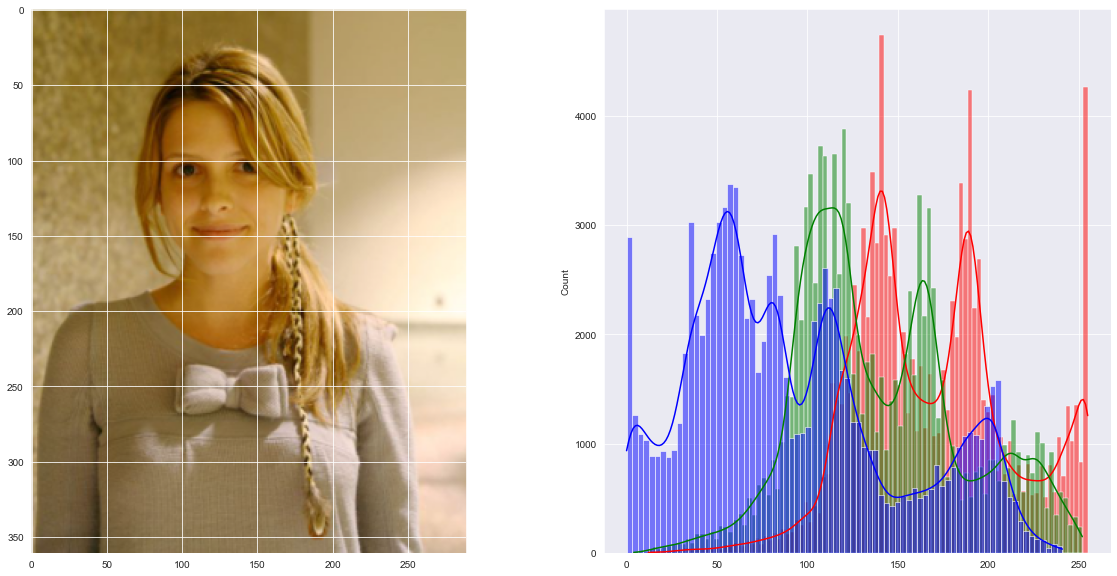

In [201]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
ax1.imshow(low_contrast_image)
sns.histplot(low_contrast_image[:,:,0].flatten()*255, kde=True, label="Positive", color='r')
sns.histplot(low_contrast_image[:,:,1].flatten()*255, kde=True, label="Positive", color='g')
sns.histplot(low_contrast_image[:,:,2].flatten()*255, kde=True, label="Positive", color='b')
plt.show()

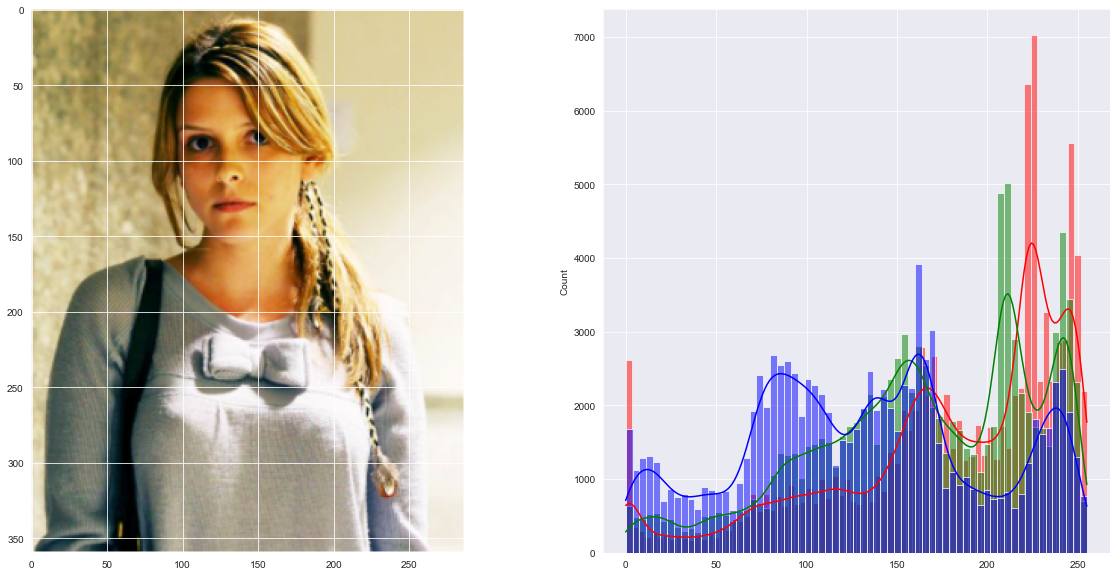

In [202]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(20,10))
ax1.imshow(high_contrast_image)
sns.histplot(high_contrast_image[:,:,0].flatten()*255, kde=True, label="Positive", color='r')
sns.histplot(high_contrast_image[:,:,1].flatten()*255, kde=True, label="Positive", color='g')
sns.histplot(high_contrast_image[:,:,2].flatten()*255, kde=True, label="Positive", color='b')
plt.show()

In [214]:
def image_brightness_comparison(image_a, image_b, **plot_kws)

    plt.figure(figsize=(10,7))
    sns.histplot(image_a.flatten()*255, bins=255, color='r', kde=True, label = plot_kws['image_a_label']);
    sns.histplot(image_b.flatten()*255, bins=255, color='g', kde=True, label = plot_kws['image_b_label']);
    plt.title(plot_kws['title'])
    plt.xlabel('Brightness value') 
    plt.ylabel('Pixel count') 
    plt.legend()

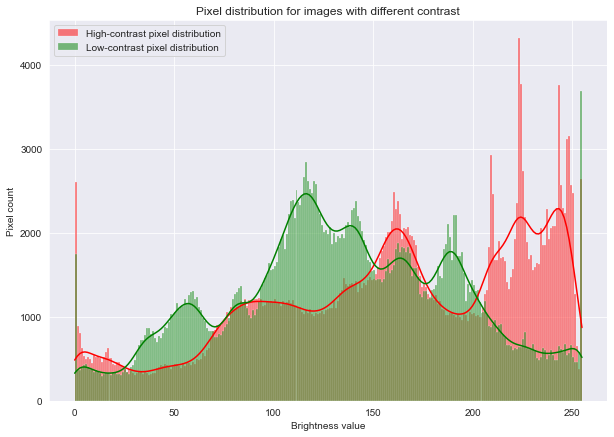

In [215]:
image_brightness_comparison(high_contrast_image, low_contrast_image,\
                            image_a_label='High-contrast pixel distribution',\
                            image_b_label='Low-contrast pixel distribution',\
                            title='Pixel distribution for images with different contrast')

In [208]:
def gamma_comparison(input_image: np.array, gamma_values: np.array, **plot_kws):
    
    plt.title('Input image')
    plt.imshow(input_image)

    fig=plt.figure(figsize=(30, 10))
    plt.suptitle('Image-hist pairs after gamma-correction',fontsize=18)

    for ix, i in enumerate(range(0, plot_kws['columns'] * plot_kws['rows'])):
        fig.add_subplot(rows, columns, i+1)
        if ((i%2)==0):
            
            image_after_gamma_increase = (((input_image))**(1/gamma_array[ix//rows]))*255
            normalized_img = (image_after_gamma_increase - image_after_gamma_increase.min()) /\
                             (image_after_gamma_increase.max() - image_after_gamma_increase.min())
            plt.imshow(normalized_img)
        else:
            sns.histplot(input_image.flatten()*255, bins=255, kde=True, color='r', label = 'High-contrast pixel distribution');
            sns.histplot(image_after_gamma_increase.flatten(),bins=255, kde=True, color='g', label = 'Increased gamma pixel distribution');
            plt.xlabel('Brightness value')
            plt.ylabel('Pixel count')
            plt.legend()

    plt.show()

In [205]:
gamma_values = 1 / np.linspace(1.1, 10, 8),

constants = {
    'rows' : 2,
    'columns' : 8
}

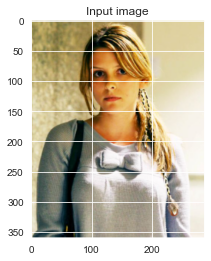

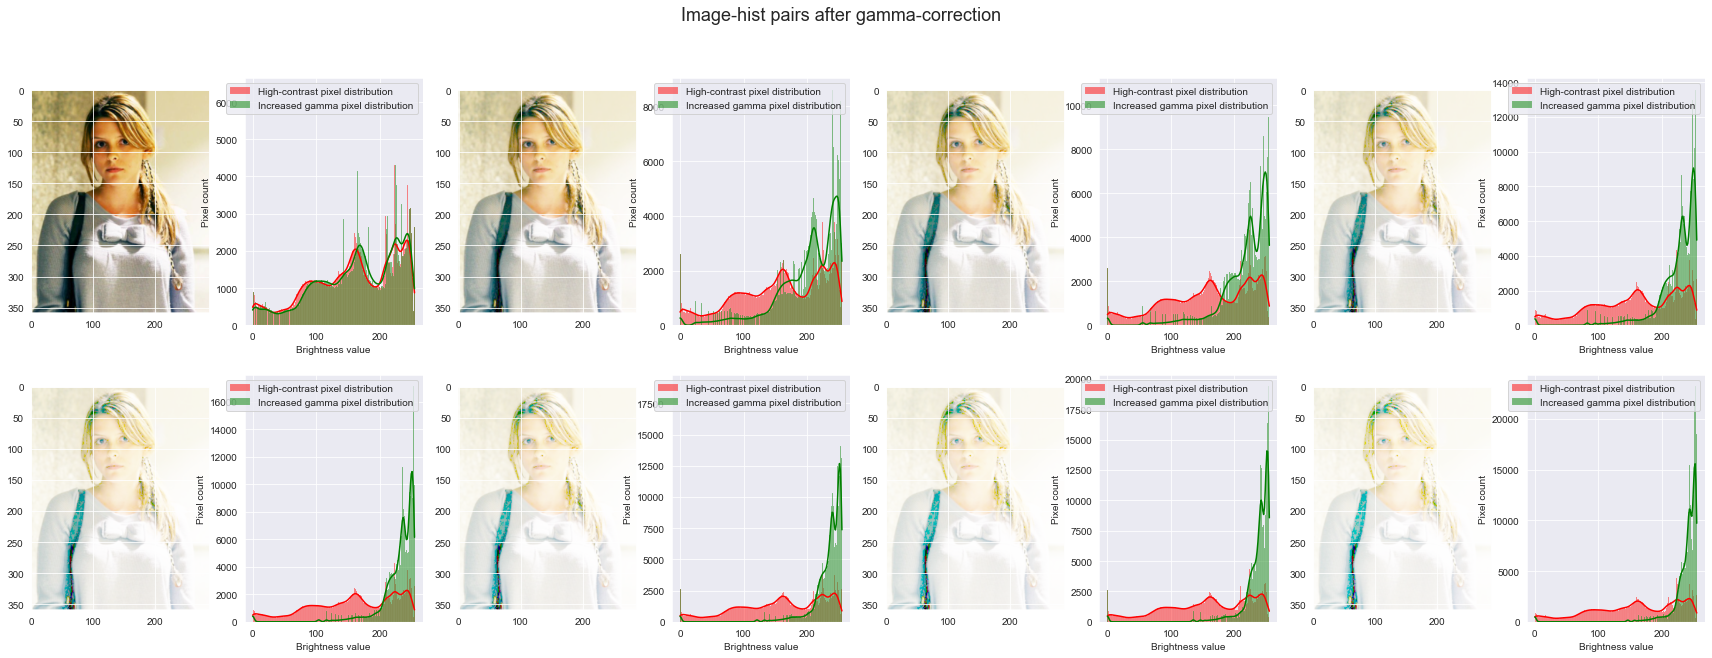

In [206]:
gamma_comparison(high_contrast_image, gamma_values, **constants)

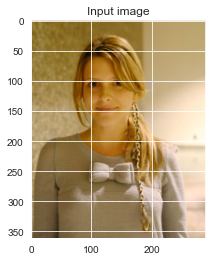

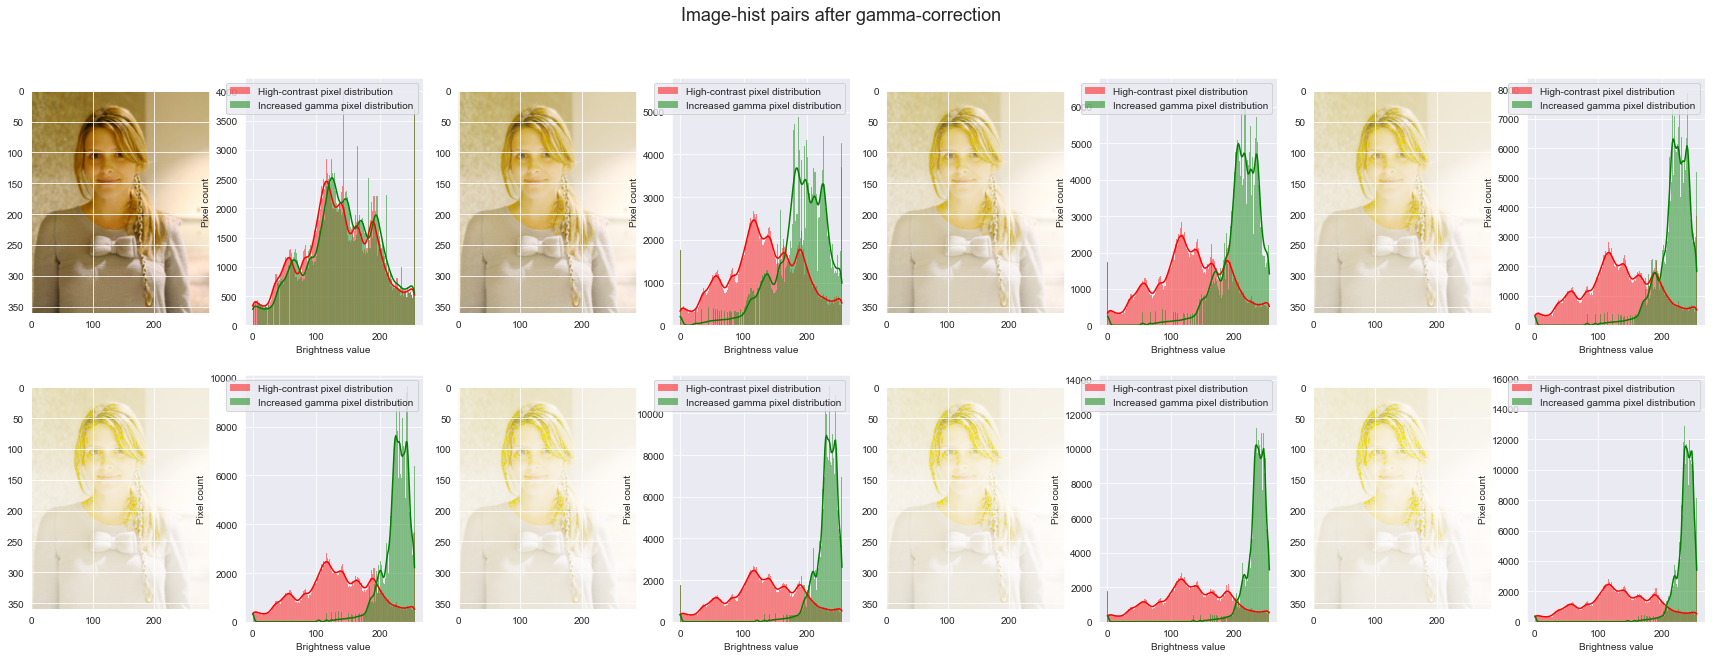

In [209]:
gamma_comparison(low_contrast_image, gamma_values, **constants)

In [210]:
blured_image = mpimg.imread('./BluredImage.png')
sharpened_image = mpimg.imread('./SharpImage.png')

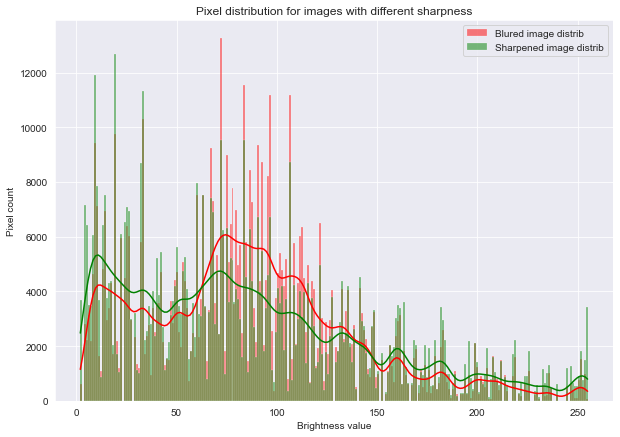

In [216]:
image_brightness_comparison(blured_image, sharpened_image,\
                            image_a_label='Blured image distrib',\
                            image_b_label='Sharpened image distrib',\
                            title='Pixel distribution for images with different sharpness')

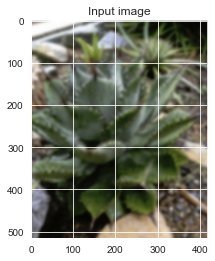

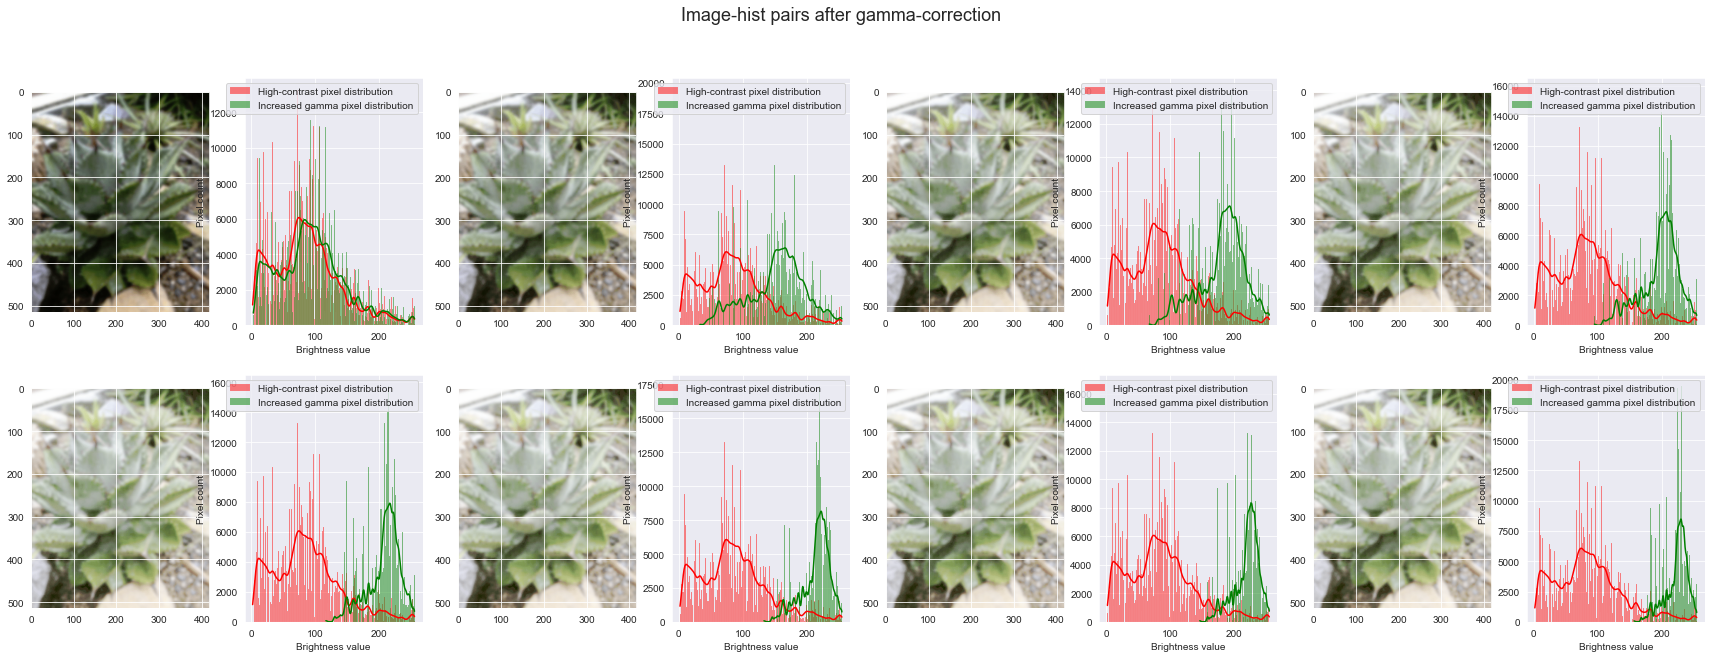

In [211]:
gamma_comparison(blured_image, gamma_values, **constants)

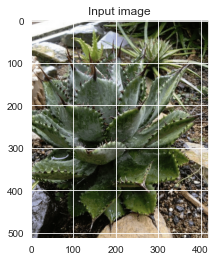

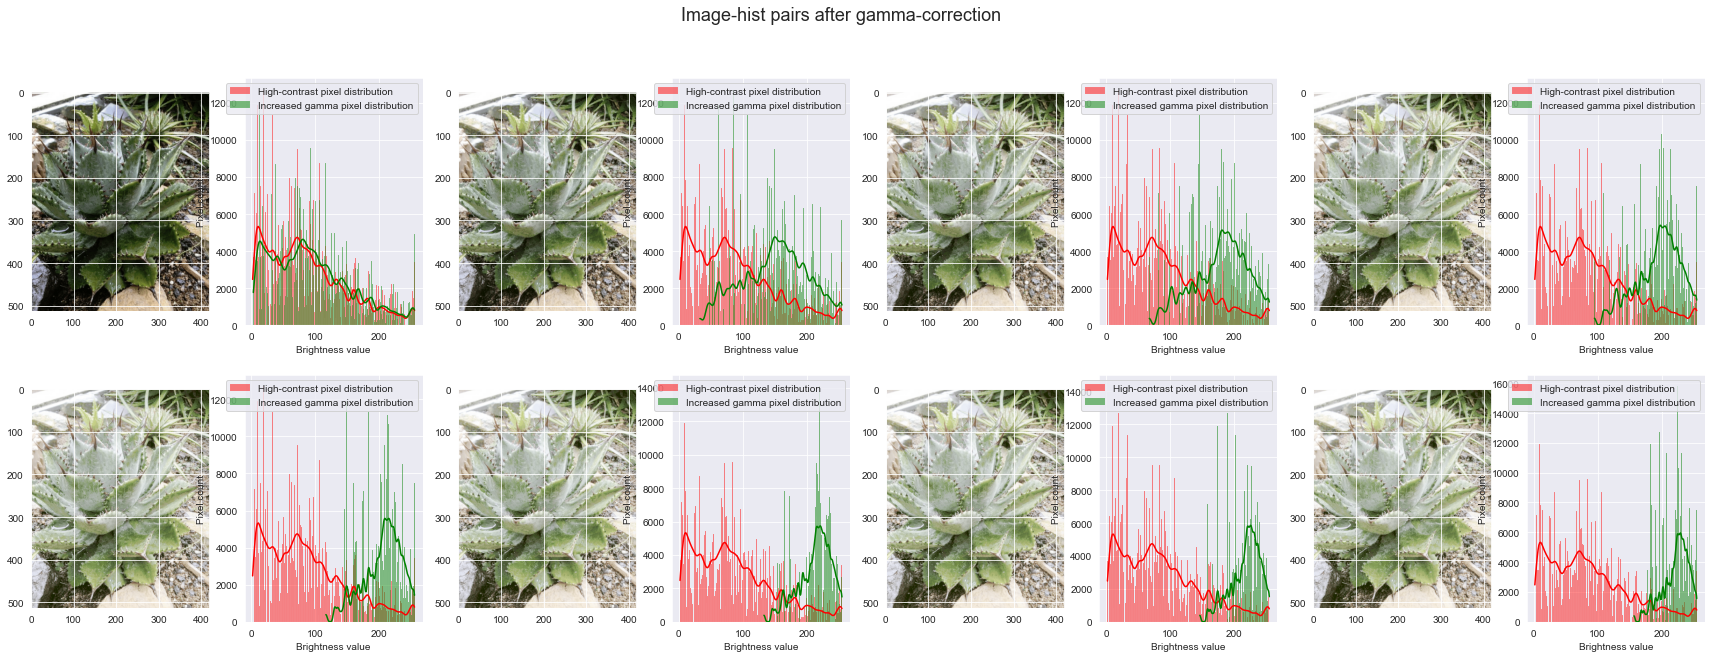

In [212]:
gamma_comparison(sharpened_image, gamma_values, **constants)

***Inference:***  
*1) Image with higher contrast has larger density on edges, when lower-contrast image is rather centered*  
*2) Gamma-enlarging generally  enlarges image brightness translating distribution to the right and reduces its deviation*  
*3) Image blurring centres pixel distribution. Thus after gamma-enlarging we've got larger mean brightness and lower  
 deviation in case of blured image*